## load data

In [2]:
#load data

import os                    #python中的os模块用于处理文件和目录
import skimage               #python中的skimage模块用于图像处理
import numpy as np           #python中的numpy模块用于科学计算
from skimage import data,transform
from skimage.color import rgb2gray     #rgb2gray将图片转化为灰度


#here data_directory="/home/zhangxueying/image/TrafficSigns/Training"
def load_data(data_directory):
    directories=[d for d in os.listdir(data_directory) if os.path.isdir(os.path.join(data_directory,d))]
    #d is every classification file
    labels=[]
    images=[]
    for d in directories:
        #每一类的路径
        label_directory=os.path.join(data_directory,d)
        file_names=[os.path.join(label_directory,f) for f in os.listdir(label_directory) if f.endswith(".ppm")]
        #file_names is every photo which is end with ".ppm"
        for f in file_names:
            images.append(skimage.data.imread(f))   #read image
            labels.append(int(d))                   #read label
    return images,labels

#images and labels are list

ROOT_PATH="D:\Young\Young\Young_G3up\Introduction to AI - Hu He\dataset"
train_data_directory=os.path.join(ROOT_PATH,"BelgiumTSC_Training\Training")
test_data_directory=os.path.join(ROOT_PATH,"BelgiumTSC_Testing\Testing")
images,labels=load_data(train_data_directory)

# Rescale the images in the `images` array
images28 = [transform.resize(image, (28, 28)) for image in images]
# Convert `images28` to an array
images28 = np.array(images28)
# Convert `images28` to grayscale
images28 = rgb2gray(images28)

D:\Anaconda\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


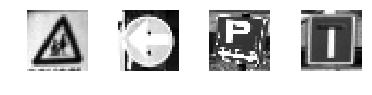

In [3]:
import matplotlib.pyplot as plt      #python中强大的画图模块
# from load import*                    #导入和预处理代码写于load.py中，需要用到其中加载和处理后的images28

traffic_signs = [300, 2250, 3650, 4000]      #随机选取

for i in range(len(traffic_signs)):     #i from 0 to 3
    plt.subplot(1, 4, i + 1)
    plt.axis('off')
    plt.imshow(images28[traffic_signs[i]], cmap="gray")
    #你确实必须指定颜色图(即 cmap)，并将其设置为 gray 以给出灰度图像的图表。
    # 这是因为 imshow() 默认使用一种类似热力图的颜色图。
    plt.subplots_adjust(wspace=0.5)       #调整各个图之间的间距

# Show the plot
plt.show()

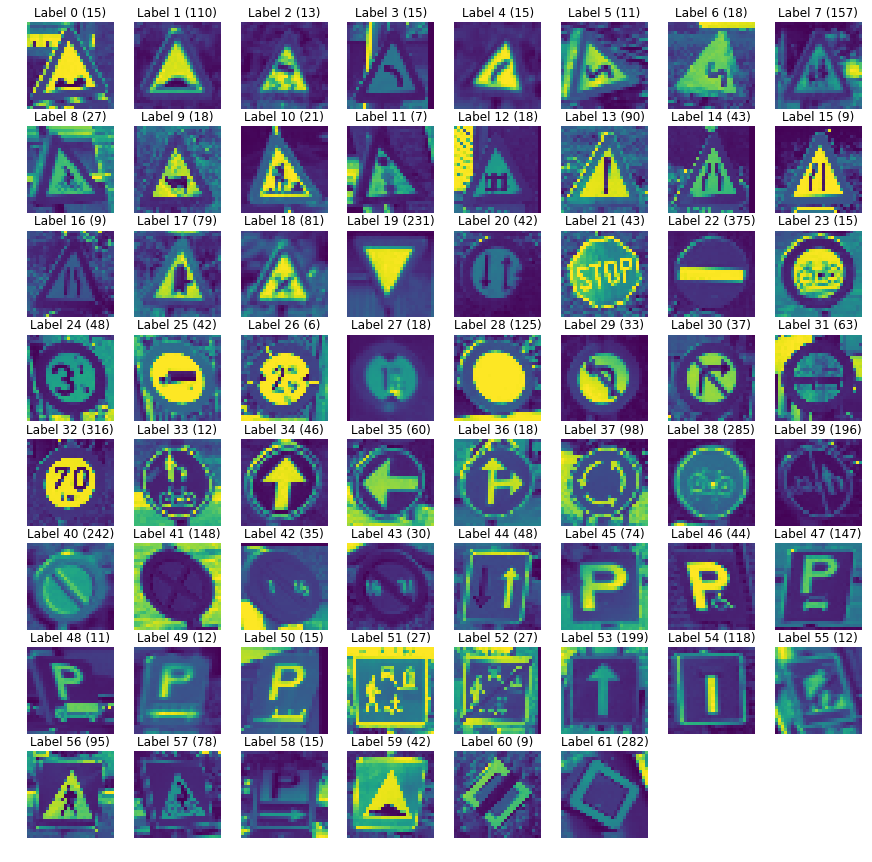

In [4]:
# Import the `pyplot` module as `plt`
import matplotlib.pyplot as plt
# from load import*

# Get the unique labels
unique_labels = set(labels)

# Initialize the figure
plt.figure(figsize=(15, 15))

# Set a counter
i = 1

# For each unique label,
for label in unique_labels:
    # You pick the first image for each label
    image = images28[labels.index(label)]
    # Define 64 subplots
    plt.subplot(8, 8, i)

    # Don't include axes
    plt.axis('off')

    # Add a title to each subplot
    plt.title("Label {0} ({1})".format(label, labels.count(label)))

    # Add 1 to the counter
    i += 1

    # And you plot this first image
    plt.imshow(image)

# Show the plot
plt.show()

In [5]:
# Import `tensorflow`
import tensorflow as tf
# from load import*

# Initialize placeholders
x = tf.placeholder(dtype=tf.float32, shape=[None, 28, 28])
y = tf.placeholder(tf.int32, [None])


#然后构建你的网络。首先使用 flatten() 函数展平输入，
# 其会给你一个形状为 [None, 784] 的数组，而不是 [None, 28, 28]——这是你的灰度图像的形状。
# Flatten the input data
images_flat = tf.contrib.layers.flatten(x)

# Fully connected layer构建一个全连接层，其可以生成大小为 [None, 62] 的 logits。logits 是运行在早期层未缩放的输出上的函数，其使用相对比例来了解单位是否是线性的。
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

# Define a loss function
#定义损失函数了。sparse_softmax_cross_entropy_with_logits()，其可以计算 logits 和标签之间的稀疏 softmax 交叉熵。回归(regression)被用于预测连续值，而分类(classification)则被用于预测离散值或数据点的类别。你可以使用 reduce_mean() 来包裹这个函数，它可以计算一个张量的维度上各个元素的均值。
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                                     logits=logits))
# Define an optimizer
train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

# Convert logits to label indexes
correct_pred = tf.argmax(logits, 1)

# Define an accuracy metric
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

'''print("images_flat: ", images_flat)

print("logits: ", logits)

print("loss: ", loss)

print("predicted_labels: ", correct_pred)
'''
tf.set_random_seed(1234)
sess = tf.Session()
writer = tf.summary.FileWriter("logs/", sess.graph)
sess.run(tf.global_variables_initializer())

for i in range(2001):
    print('EPOCH', i)
    _, accuracy_val = sess.run([train_op, accuracy], feed_dict={x: images28, y: labels})
    if i % 10 == 0:
        print("Loss: ", loss)
    print('DONE WITH EPOCH')

EPOCH 0
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 1
DONE WITH EPOCH
EPOCH 2
DONE WITH EPOCH
EPOCH 3
DONE WITH EPOCH
EPOCH 4
DONE WITH EPOCH
EPOCH 5
DONE WITH EPOCH
EPOCH 6
DONE WITH EPOCH
EPOCH 7
DONE WITH EPOCH
EPOCH 8
DONE WITH EPOCH
EPOCH 9
DONE WITH EPOCH
EPOCH 10
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 11
DONE WITH EPOCH
EPOCH 12
DONE WITH EPOCH
EPOCH 13
DONE WITH EPOCH
EPOCH 14
DONE WITH EPOCH
EPOCH 15
DONE WITH EPOCH
EPOCH 16
DONE WITH EPOCH
EPOCH 17
DONE WITH EPOCH
EPOCH 18
DONE WITH EPOCH
EPOCH 19
DONE WITH EPOCH
EPOCH 20
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 21
DONE WITH EPOCH
EPOCH 22
DONE WITH EPOCH
EPOCH 23
DONE WITH EPOCH
EPOCH 24
DONE WITH EPOCH
EPOCH 25
DONE WITH EPOCH
EPOCH 26
DONE WITH EPOCH
EPOCH 27
DONE WITH EPOCH
EPOCH 28
DONE WITH EPOCH
EPOCH 29
DONE WITH EPOCH
EPOCH 30
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 31
DONE WITH EPOCH
EPOCH 

DONE WITH EPOCH
EPOCH 267
DONE WITH EPOCH
EPOCH 268
DONE WITH EPOCH
EPOCH 269
DONE WITH EPOCH
EPOCH 270
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 271
DONE WITH EPOCH
EPOCH 272
DONE WITH EPOCH
EPOCH 273
DONE WITH EPOCH
EPOCH 274
DONE WITH EPOCH
EPOCH 275
DONE WITH EPOCH
EPOCH 276
DONE WITH EPOCH
EPOCH 277
DONE WITH EPOCH
EPOCH 278
DONE WITH EPOCH
EPOCH 279
DONE WITH EPOCH
EPOCH 280
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 281
DONE WITH EPOCH
EPOCH 282
DONE WITH EPOCH
EPOCH 283
DONE WITH EPOCH
EPOCH 284
DONE WITH EPOCH
EPOCH 285
DONE WITH EPOCH
EPOCH 286
DONE WITH EPOCH
EPOCH 287
DONE WITH EPOCH
EPOCH 288
DONE WITH EPOCH
EPOCH 289
DONE WITH EPOCH
EPOCH 290
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 291
DONE WITH EPOCH
EPOCH 292
DONE WITH EPOCH
EPOCH 293
DONE WITH EPOCH
EPOCH 294
DONE WITH EPOCH
EPOCH 295
DONE WITH EPOCH
EPOCH 296
DONE WITH EPOCH
EPOCH 297
DONE WITH EPOCH
EPOCH 298
DONE WITH EPOCH

DONE WITH EPOCH
EPOCH 532
DONE WITH EPOCH
EPOCH 533
DONE WITH EPOCH
EPOCH 534
DONE WITH EPOCH
EPOCH 535
DONE WITH EPOCH
EPOCH 536
DONE WITH EPOCH
EPOCH 537
DONE WITH EPOCH
EPOCH 538
DONE WITH EPOCH
EPOCH 539
DONE WITH EPOCH
EPOCH 540
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 541
DONE WITH EPOCH
EPOCH 542
DONE WITH EPOCH
EPOCH 543
DONE WITH EPOCH
EPOCH 544
DONE WITH EPOCH
EPOCH 545
DONE WITH EPOCH
EPOCH 546
DONE WITH EPOCH
EPOCH 547
DONE WITH EPOCH
EPOCH 548
DONE WITH EPOCH
EPOCH 549
DONE WITH EPOCH
EPOCH 550
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 551
DONE WITH EPOCH
EPOCH 552
DONE WITH EPOCH
EPOCH 553
DONE WITH EPOCH
EPOCH 554
DONE WITH EPOCH
EPOCH 555
DONE WITH EPOCH
EPOCH 556
DONE WITH EPOCH
EPOCH 557
DONE WITH EPOCH
EPOCH 558
DONE WITH EPOCH
EPOCH 559
DONE WITH EPOCH
EPOCH 560
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 561
DONE WITH EPOCH
EPOCH 562
DONE WITH EPOCH
EPOCH 563
DONE WITH EPOCH

DONE WITH EPOCH
EPOCH 804
DONE WITH EPOCH
EPOCH 805
DONE WITH EPOCH
EPOCH 806
DONE WITH EPOCH
EPOCH 807
DONE WITH EPOCH
EPOCH 808
DONE WITH EPOCH
EPOCH 809
DONE WITH EPOCH
EPOCH 810
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 811
DONE WITH EPOCH
EPOCH 812
DONE WITH EPOCH
EPOCH 813
DONE WITH EPOCH
EPOCH 814
DONE WITH EPOCH
EPOCH 815
DONE WITH EPOCH
EPOCH 816
DONE WITH EPOCH
EPOCH 817
DONE WITH EPOCH
EPOCH 818
DONE WITH EPOCH
EPOCH 819
DONE WITH EPOCH
EPOCH 820
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 821
DONE WITH EPOCH
EPOCH 822
DONE WITH EPOCH
EPOCH 823
DONE WITH EPOCH
EPOCH 824
DONE WITH EPOCH
EPOCH 825
DONE WITH EPOCH
EPOCH 826
DONE WITH EPOCH
EPOCH 827
DONE WITH EPOCH
EPOCH 828
DONE WITH EPOCH
EPOCH 829
DONE WITH EPOCH
EPOCH 830
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 831
DONE WITH EPOCH
EPOCH 832
DONE WITH EPOCH
EPOCH 833
DONE WITH EPOCH
EPOCH 834
DONE WITH EPOCH
EPOCH 835
DONE WITH EPOCH

DONE WITH EPOCH
EPOCH 1066
DONE WITH EPOCH
EPOCH 1067
DONE WITH EPOCH
EPOCH 1068
DONE WITH EPOCH
EPOCH 1069
DONE WITH EPOCH
EPOCH 1070
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 1071
DONE WITH EPOCH
EPOCH 1072
DONE WITH EPOCH
EPOCH 1073
DONE WITH EPOCH
EPOCH 1074
DONE WITH EPOCH
EPOCH 1075
DONE WITH EPOCH
EPOCH 1076
DONE WITH EPOCH
EPOCH 1077
DONE WITH EPOCH
EPOCH 1078
DONE WITH EPOCH
EPOCH 1079
DONE WITH EPOCH
EPOCH 1080
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 1081
DONE WITH EPOCH
EPOCH 1082
DONE WITH EPOCH
EPOCH 1083
DONE WITH EPOCH
EPOCH 1084
DONE WITH EPOCH
EPOCH 1085
DONE WITH EPOCH
EPOCH 1086
DONE WITH EPOCH
EPOCH 1087
DONE WITH EPOCH
EPOCH 1088
DONE WITH EPOCH
EPOCH 1089
DONE WITH EPOCH
EPOCH 1090
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 1091
DONE WITH EPOCH
EPOCH 1092
DONE WITH EPOCH
EPOCH 1093
DONE WITH EPOCH
EPOCH 1094
DONE WITH EPOCH
EPOCH 1095
DONE WITH EPOCH
EPOCH 1096
DONE WITH 

DONE WITH EPOCH
EPOCH 1325
DONE WITH EPOCH
EPOCH 1326
DONE WITH EPOCH
EPOCH 1327
DONE WITH EPOCH
EPOCH 1328
DONE WITH EPOCH
EPOCH 1329
DONE WITH EPOCH
EPOCH 1330
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 1331
DONE WITH EPOCH
EPOCH 1332
DONE WITH EPOCH
EPOCH 1333
DONE WITH EPOCH
EPOCH 1334
DONE WITH EPOCH
EPOCH 1335
DONE WITH EPOCH
EPOCH 1336
DONE WITH EPOCH
EPOCH 1337
DONE WITH EPOCH
EPOCH 1338
DONE WITH EPOCH
EPOCH 1339
DONE WITH EPOCH
EPOCH 1340
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 1341
DONE WITH EPOCH
EPOCH 1342
DONE WITH EPOCH
EPOCH 1343
DONE WITH EPOCH
EPOCH 1344
DONE WITH EPOCH
EPOCH 1345
DONE WITH EPOCH
EPOCH 1346
DONE WITH EPOCH
EPOCH 1347
DONE WITH EPOCH
EPOCH 1348
DONE WITH EPOCH
EPOCH 1349
DONE WITH EPOCH
EPOCH 1350
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 1351
DONE WITH EPOCH
EPOCH 1352
DONE WITH EPOCH
EPOCH 1353
DONE WITH EPOCH
EPOCH 1354
DONE WITH EPOCH
EPOCH 1355
DONE WITH 

DONE WITH EPOCH
EPOCH 1587
DONE WITH EPOCH
EPOCH 1588
DONE WITH EPOCH
EPOCH 1589
DONE WITH EPOCH
EPOCH 1590
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 1591
DONE WITH EPOCH
EPOCH 1592
DONE WITH EPOCH
EPOCH 1593
DONE WITH EPOCH
EPOCH 1594
DONE WITH EPOCH
EPOCH 1595
DONE WITH EPOCH
EPOCH 1596
DONE WITH EPOCH
EPOCH 1597
DONE WITH EPOCH
EPOCH 1598
DONE WITH EPOCH
EPOCH 1599
DONE WITH EPOCH
EPOCH 1600
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 1601
DONE WITH EPOCH
EPOCH 1602
DONE WITH EPOCH
EPOCH 1603
DONE WITH EPOCH
EPOCH 1604
DONE WITH EPOCH
EPOCH 1605
DONE WITH EPOCH
EPOCH 1606
DONE WITH EPOCH
EPOCH 1607
DONE WITH EPOCH
EPOCH 1608
DONE WITH EPOCH
EPOCH 1609
DONE WITH EPOCH
EPOCH 1610
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 1611
DONE WITH EPOCH
EPOCH 1612
DONE WITH EPOCH
EPOCH 1613
DONE WITH EPOCH
EPOCH 1614
DONE WITH EPOCH
EPOCH 1615
DONE WITH EPOCH
EPOCH 1616
DONE WITH EPOCH
EPOCH 1617
DONE WITH 

DONE WITH EPOCH
EPOCH 1845
DONE WITH EPOCH
EPOCH 1846
DONE WITH EPOCH
EPOCH 1847
DONE WITH EPOCH
EPOCH 1848
DONE WITH EPOCH
EPOCH 1849
DONE WITH EPOCH
EPOCH 1850
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 1851
DONE WITH EPOCH
EPOCH 1852
DONE WITH EPOCH
EPOCH 1853
DONE WITH EPOCH
EPOCH 1854
DONE WITH EPOCH
EPOCH 1855
DONE WITH EPOCH
EPOCH 1856
DONE WITH EPOCH
EPOCH 1857
DONE WITH EPOCH
EPOCH 1858
DONE WITH EPOCH
EPOCH 1859
DONE WITH EPOCH
EPOCH 1860
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 1861
DONE WITH EPOCH
EPOCH 1862
DONE WITH EPOCH
EPOCH 1863
DONE WITH EPOCH
EPOCH 1864
DONE WITH EPOCH
EPOCH 1865
DONE WITH EPOCH
EPOCH 1866
DONE WITH EPOCH
EPOCH 1867
DONE WITH EPOCH
EPOCH 1868
DONE WITH EPOCH
EPOCH 1869
DONE WITH EPOCH
EPOCH 1870
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 1871
DONE WITH EPOCH
EPOCH 1872
DONE WITH EPOCH
EPOCH 1873
DONE WITH EPOCH
EPOCH 1874
DONE WITH EPOCH
EPOCH 1875
DONE WITH 

[56, 35, 40, 19, 38, 39, 17, 19, 55, 53]
[18 35 40 19 38 39 17 19 54 53]


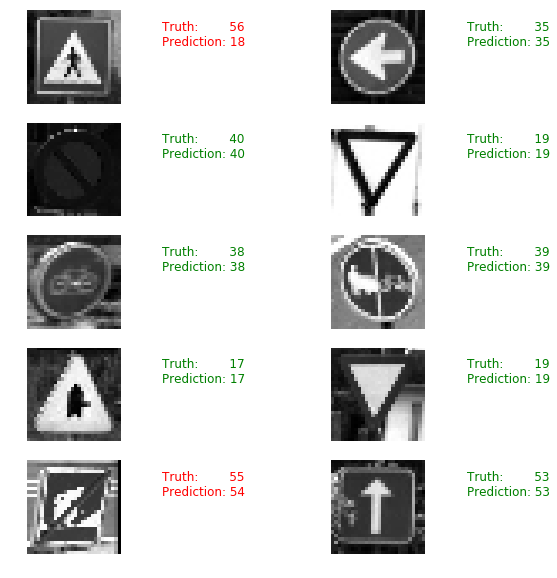

In [8]:
# Import `matplotlib`
import matplotlib.pyplot as plt
import random       #随机
# from nnet import*  
# Pick 10 random images
sample_indexes = random.sample(range(len(images28)), 10) 
sample_images = [images28[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

# Run the "correct_pred" operation
predicted = sess.run([correct_pred], feed_dict={x: sample_images})[0]

# Print the real and predicted labels
print(sample_labels)
print(predicted)

# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2, 1 + i)
    plt.axis('off')
    color = 'green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction),
             fontsize=12, color=color)
    plt.imshow(sample_images[i], cmap="gray")

plt.show()

In [9]:
# Import `skimage`
from skimage import transform
# from nnet import*

# Load the test data
test_images, test_labels = load_data(test_data_directory)

# Transform the images to 28 by 28 pixels
test_images28 = [transform.resize(image, (28, 28)) for image in test_images]

# Convert to grayscale
from skimage.color import rgb2gray

test_images28 = rgb2gray(np.array(test_images28))

# Run predictions against the full test set.
predicted = sess.run([correct_pred], feed_dict={x: test_images28})[0]

# Calculate correct matches
match_count = sum([int(y == y_) for y, y_ in zip(test_labels, predicted)])

# Calculate the accuracy
accuracy = match_count / len(test_labels)

# Print the accuracy
print("Accuracy: {:.3f}".format(accuracy))

D:\Anaconda\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Accuracy: 0.688
